In [ ]:
! pip install biopython==1.68

     |████████████████████████████████| 14.4 MB 14.1 MB/s 
  Created wheel for biopython: filename=biopython-1.68-cp37-cp37m-linux_x86_64.whl size=2174341 sha256=00ff21d0ed867dca450c43131f5c74321d6ed0a081f5b6d288c871ebfd4452d4
  Stored in directory: /root/.cache/pip/wheels/1f/0f/c5/1e4f778c096128191d45b358002d2a17419a95beac6266335c
Successfully built biopython
  Attempting uninstall: biopython
    Found existing installation: biopython 1.79
    Uninstalling biopython-1.79:
      Successfully uninstalled biopython-1.79


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from Bio.Seq import Seq
from collections import Counter
from Bio import pairwise2
from Bio.Alphabet import generic_protein

## Loading sequences files and analysis

In [ ]:
reference_path='/content/reference.fasta'
HKU1_path='/content/HKU1.fasta'
NL63_path='/content/NL63.fasta'

In [ ]:
def parse_file(file):
  genome=''
  with open(file) as f:
    for line in f:
      if not line[0]=='>':
        genome+=line.rstrip()
  return genome

In [ ]:
reference_seq=parse_file(reference_path)
HKU1_seq=parse_file(HKU1_path)
NL63_seq=parse_file(NL63_path)

In [ ]:
len(reference_seq)

29903

In [ ]:
len(HKU1_seq)

29926

In [ ]:
len(NL63_seq)

27553

In [ ]:

spike_path='/content/spike.fna'
spike_seq=parse_file(spike_path)

N_path='/content/n.fna'
N_seq=parse_file(N_path)

M_path='/content/M.fna'
M_seq=parse_file(M_path)

## GC and AT content

In [ ]:
def GC_AT_content(sequence):
  gc=sequence.count('G')+sequence.count('C')
  gc_cont=gc*100/len(sequence)
  at_cont=100-gc_cont
  result=print('GC% content= ',gc_cont,'\n','AT% content= ',at_cont)

In [ ]:
# Reference sequence
GC_AT_content(reference_seq)

GC% content=  37.97277865097148 
 AT% content=  62.02722134902852


In [ ]:
# HKU1 sequence
GC_AT_content(HKU1_seq)

GC% content=  32.05907906168549 
 AT% content=  67.94092093831452


In [ ]:
# NL63 sequence
GC_AT_content(NL63_seq)

GC% content=  34.46085725692302 
 AT% content=  65.53914274307698


In [ ]:
df=pd.DataFrame({'Contenido GC%':[37.97277865097148,32.05907906168549 ,34.46085725692302],'Contenido AT%':[62.02722134902852,67.94092093831452,65.53914274307698]},index=['Genoma de referencia','Genoma HKU1','Genoma NL63'])
df

,Contenido GC%,Contenido AT%
Genoma de referencia,37.972779,62.027221
Genoma HKU1,32.059079,67.940921
Genoma NL63,34.460857,65.539143


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


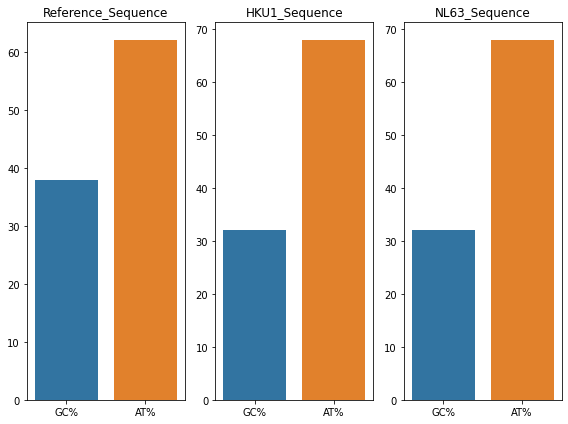

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(8,6))
sns.barplot(['GC%','AT%'],[37.97277865097148 ,62.02722134902852],ax=axes[0],).set(title='Reference_Sequence')
sns.barplot(['GC%','AT%'],[32.05907906168549 ,67.94092093831452],ax=axes[1],).set(title='HKU1_Sequence')
sns.barplot(['GC%','AT%'],[32.05907906168549 ,67.94092093831452],ax=axes[2],).set(title='NL63_Sequence')
sns.set_style('darkgrid')
plt.tight_layout()

## Nucleotide count

In [ ]:
def count_nucleotides(name,seq):
  count={'A':0,'T':0,'C':0,'G':0}
  for i in seq:
    count[i]+=1
  return name,count

In [ ]:
count_nucleotides('Reference',reference_seq)

('Reference', {'A': 8954, 'C': 5492, 'G': 5863, 'T': 9594})

In [ ]:
count_nucleotides('HKU1',HKU1_seq)

('HKU1', {'A': 8331, 'C': 3895, 'G': 5699, 'T': 12001})

In [ ]:
count_nucleotides('NL63',NL63_seq)

('NL63', {'A': 7253, 'C': 3979, 'G': 5516, 'T': 10805})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


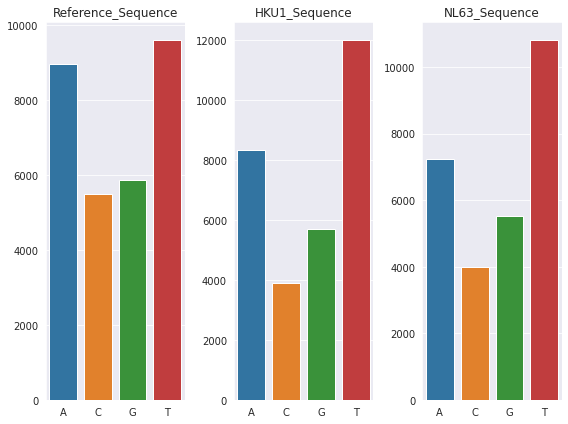

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(8,6))
ax1=sns.barplot(['A','C','G','T'],[8954,5492,5863,9594],ax=axes[0],).set(title='Reference_Sequence')
sns.barplot(['A','C','G','T'],[8331,3895,5699,12001],ax=axes[1],).set(title='HKU1_Sequence')
sns.barplot(['A','C','G','T'],[7253,3979,5516,10805],ax=axes[2],).set(title='NL63_Sequence')
sns.set_style('darkgrid')
plt.tight_layout()

## Converting DNA sequences to codons and codons count

In [ ]:
def to_codons(seq):
    rna=seq.replace('T','U')
    codon_string=[]
    for i in range(0,len(rna),3):
      codon_string.append(rna[i:i+3])
    return codon_string
  

In [ ]:
reference_seq_codons=to_codons(reference_seq)
HKU1_seq_codons=to_codons(HKU1_seq)
NL63_seq_codons=to_codons(NL63_seq)

In [ ]:
def count_codons(codon_seq):
  recount=Counter(codon_seq)
  return recount

In [ ]:
count_codons(reference_seq_codons).values()

dict_values([208, 303, 149, 232, 227, 208, 42, 123, 342, 233, 150, 212, 34, 112, 190, 367, 277, 233, 78, 60, 383, 93, 169, 101, 220, 33, 80, 172, 128, 268, 160, 116, 121, 116, 260, 54, 304, 92, 123, 197, 210, 75, 178, 28, 141, 249, 186, 167, 112, 84, 107, 263, 31, 115, 68, 84, 173, 110, 278, 49, 40, 22, 117, 110, 1])

In [ ]:
count_codons(reference_seq_codons).keys()

dict_keys(['AUU', 'AAA', 'GGU', 'UUA', 'UAC', 'CUU', 'CCC', 'AGG', 'UAA', 'CAA', 'ACC', 'AAC', 'UCG', 'AUC', 'UCU', 'UGU', 'AGA', 'GUU', 'CUC', 'ACG', 'UUU', 'GUG', 'GCU', 'GUC', 'ACU', 'CGG', 'CUG', 'CAU', 'UAG', 'UGC', 'CAC', 'GCA', 'GUA', 'AUA', 'AAU', 'CGU', 'UGA', 'CAG', 'GAC', 'AGU', 'UUC', 'UCC', 'UUG', 'CCG', 'AGC', 'ACA', 'GAA', 'GAU', 'GGA', 'GAG', 'CCU', 'UGG', 'CGA', 'CCA', 'GCC', 'GGC', 'UCA', 'CUA', 'UAU', 'GGG', 'CGC', 'GCG', 'AUG', 'AAG', 'AA'])

In [ ]:
count_codons(HKU1_seq_codons).values()

dict_values([83, 627, 39, 281, 28, 167, 126, 16, 237, 102, 97, 392, 144, 68, 195, 105, 388, 214, 143, 109, 347, 163, 536, 209, 147, 500, 37, 47, 49, 238, 67, 72, 28, 22, 355, 255, 103, 56, 129, 17, 72, 329, 36, 73, 60, 165, 135, 148, 307, 34, 232, 156, 197, 141, 113, 76, 65, 103, 274, 71, 89, 67, 73, 21, 1])

In [ ]:
count_codons(reference_seq_codons).keys()

dict_keys(['AUU', 'AAA', 'GGU', 'UUA', 'UAC', 'CUU', 'CCC', 'AGG', 'UAA', 'CAA', 'ACC', 'AAC', 'UCG', 'AUC', 'UCU', 'UGU', 'AGA', 'GUU', 'CUC', 'ACG', 'UUU', 'GUG', 'GCU', 'GUC', 'ACU', 'CGG', 'CUG', 'CAU', 'UAG', 'UGC', 'CAC', 'GCA', 'GUA', 'AUA', 'AAU', 'CGU', 'UGA', 'CAG', 'GAC', 'AGU', 'UUC', 'UCC', 'UUG', 'CCG', 'AGC', 'ACA', 'GAA', 'GAU', 'GGA', 'GAG', 'CCU', 'UGG', 'CGA', 'CCA', 'GCC', 'GGC', 'UCA', 'CUA', 'UAU', 'GGG', 'CGC', 'GCG', 'AUG', 'AAG', 'AA'])

In [ ]:
count_codons(NL63_seq_codons).values()

dict_values([197, 224, 119, 558, 183, 328, 113, 148, 135, 55, 210, 270, 186, 305, 493, 63, 136, 15, 157, 169, 128, 76, 53, 75, 128, 36, 351, 184, 99, 348, 103, 117, 79, 280, 304, 136, 167, 64, 56, 84, 136, 107, 84, 275, 119, 65, 208, 89, 63, 19, 194, 16, 14, 177, 89, 29, 62, 45, 121, 41, 73, 172, 18, 36, 1])

In [ ]:
count_codons(NL63_seq_codons).keys()

dict_keys(['CUU', 'AAA', 'GAA', 'UUU', 'UUC', 'UAU', 'CUA', 'UAG', 'AUA', 'GAG', 'AAU', 'AUU', 'ACU', 'UUG', 'UGU', 'CUC', 'UCA', 'CGA', 'UCU', 'AGU', 'GCU', 'GUC', 'GGC', 'CCU', 'GUA', 'UCG', 'UAA', 'GGU', 'GCA', 'GUU', 'GUG', 'AAG', 'CAC', 'UGG', 'UGA', 'CAU', 'ACA', 'UCC', 'GGA', 'AGC', 'AAC', 'CUG', 'CCA', 'UUA', 'CAA', 'GAC', 'UGC', 'AGG', 'CGU', 'CGC', 'AUG', 'CCG', 'CGG', 'UAC', 'ACC', 'GCG', 'CAG', 'ACG', 'AGA', 'GCC', 'AUC', 'GAU', 'CCC', 'GGG', 'C'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 <a list of 65 Text major ticklabel objects>)

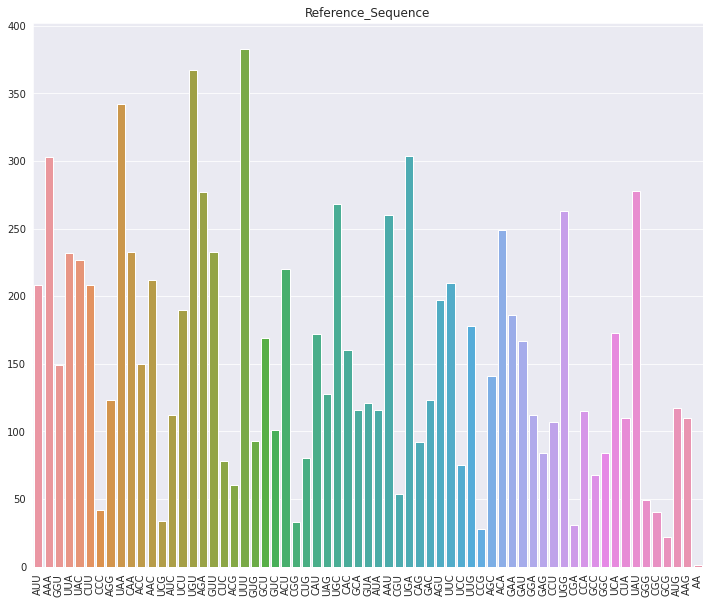

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(['AUU', 'AAA', 'GGU', 'UUA', 'UAC', 'CUU', 'CCC', 'AGG', 'UAA', 'CAA', 'ACC', 'AAC', 'UCG', 'AUC', 'UCU', 'UGU', 'AGA', 'GUU', 'CUC', 'ACG', 'UUU', 'GUG', 'GCU', 'GUC', 'ACU', 'CGG', 'CUG', 'CAU', 'UAG', 'UGC', 'CAC', 'GCA', 'GUA', 'AUA', 'AAU', 'CGU', 'UGA', 'CAG', 'GAC', 'AGU', 'UUC', 'UCC', 'UUG', 'CCG', 'AGC', 'ACA', 'GAA', 'GAU', 'GGA', 'GAG', 'CCU', 'UGG', 'CGA', 'CCA', 'GCC', 'GGC', 'UCA', 'CUA', 'UAU', 'GGG', 'CGC', 'GCG', 'AUG', 'AAG', 'AA'],[208, 303, 149, 232, 227, 208, 42, 123, 342, 233, 150, 212, 34, 112, 190, 367, 277, 233, 78, 60, 383, 93, 169, 101, 220, 33, 80, 172, 128, 268, 160, 116, 121, 116, 260, 54, 304, 92, 123, 197, 210, 75, 178, 28, 141, 249, 186, 167, 112, 84, 107, 263, 31, 115, 68, 84, 173, 110, 278, 49, 40, 22, 117, 110, 1]).set(title='Reference_Sequence')
sns.set_style('darkgrid')
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


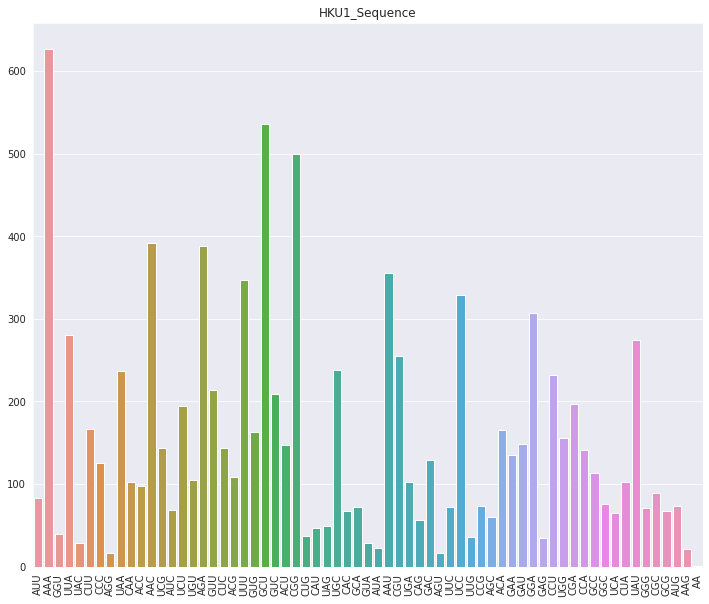

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(['AUU', 'AAA', 'GGU', 'UUA', 'UAC', 'CUU', 'CCC', 'AGG', 'UAA', 'CAA', 'ACC', 'AAC', 'UCG', 'AUC', 'UCU', 'UGU', 'AGA', 'GUU', 'CUC', 'ACG', 'UUU', 'GUG', 'GCU', 'GUC', 'ACU', 'CGG', 'CUG', 'CAU', 'UAG', 'UGC', 'CAC', 'GCA', 'GUA', 'AUA', 'AAU', 'CGU', 'UGA', 'CAG', 'GAC', 'AGU', 'UUC', 'UCC', 'UUG', 'CCG', 'AGC', 'ACA', 'GAA', 'GAU', 'GGA', 'GAG', 'CCU', 'UGG', 'CGA', 'CCA', 'GCC', 'GGC', 'UCA', 'CUA', 'UAU', 'GGG', 'CGC', 'GCG', 'AUG', 'AAG', 'AA'],[83, 627, 39, 281, 28, 167, 126, 16, 237, 102, 97, 392, 144, 68, 195, 105, 388, 214, 143, 109, 347, 163, 536, 209, 147, 500, 37, 47, 49, 238, 67, 72, 28, 22, 355, 255, 103, 56, 129, 17, 72, 329, 36, 73, 60, 165, 135, 148, 307, 34, 232, 156, 197, 141, 113, 76, 65, 103, 274, 71, 89, 67, 73, 21, 1]).set(title='HKU1_Sequence')
plt.xticks(rotation=90)
sns.set_style('darkgrid')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


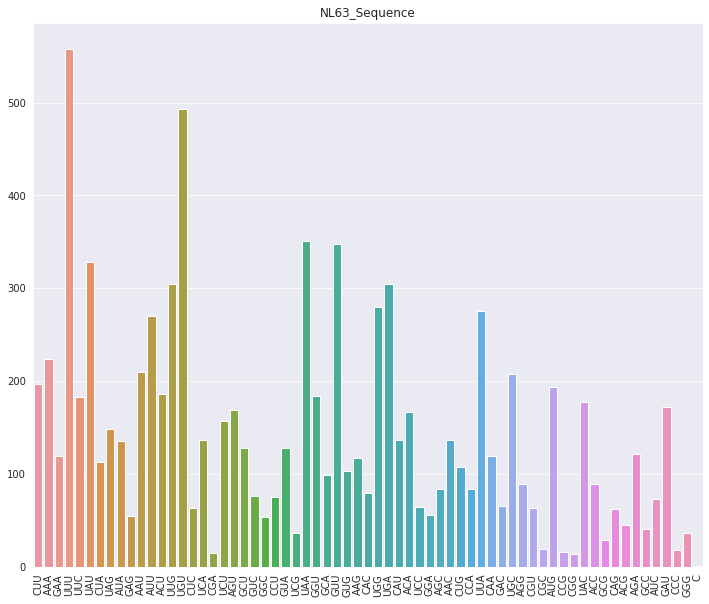

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(['CUU', 'AAA', 'GAA', 'UUU', 'UUC', 'UAU', 'CUA', 'UAG', 'AUA', 'GAG', 'AAU', 'AUU', 'ACU', 'UUG', 'UGU', 'CUC', 'UCA', 'CGA', 'UCU', 'AGU', 'GCU', 'GUC', 'GGC', 'CCU', 'GUA', 'UCG', 'UAA', 'GGU', 'GCA', 'GUU', 'GUG', 'AAG', 'CAC', 'UGG', 'UGA', 'CAU', 'ACA', 'UCC', 'GGA', 'AGC', 'AAC', 'CUG', 'CCA', 'UUA', 'CAA', 'GAC', 'UGC', 'AGG', 'CGU', 'CGC', 'AUG', 'CCG', 'CGG', 'UAC', 'ACC', 'GCG', 'CAG', 'ACG', 'AGA', 'GCC', 'AUC', 'GAU', 'CCC', 'GGG', 'C'],[197, 224, 119, 558, 183, 328, 113, 148, 135, 55, 210, 270, 186, 305, 493, 63, 136, 15, 157, 169, 128, 76, 53, 75, 128, 36, 351, 184, 99, 348, 103, 117, 79, 280, 304, 136, 167, 64, 56, 84, 136, 107, 84, 275, 119, 65, 208, 89, 63, 19, 194, 16, 14, 177, 89, 29, 62, 45, 121, 41, 73, 172, 18, 36, 1]).set(title='NL63_Sequence')
plt.xticks(rotation=90)
sns.set_style('darkgrid')

## Protein searching inside genomes and finding the position where they are encoded by a gene inside the different Coronavirus genomes.

False= Protein is not found inside the genome of the virus. That particular protein is not produced by the virus

True= Protein is found inside the genome of the virus. That particular protein is produced by the virus.



In [ ]:
# This particular spike protein is found in the reference virus sequence but not in the other two.
spike_seq in reference_seq, spike_seq in HKU1_seq, spike_seq in NL63_seq

(True, False, False)

In [ ]:
# It is found in position 21562 of the genome of the virus.
reference_seq.find(spike_seq)

21562

In [ ]:
# This particular orf6 protein is found in the reference virus sequence but not in the other two.
N_seq in reference_seq, N_seq in HKU1_seq, N_seq in NL63_seq

(False, True, False)

In [ ]:
# It is found in position 28319 of the genome of the virus.
HKU1_seq.find(N_seq)

28319

In [ ]:
# This particular M protein is found in NL63 sequence.
M_seq in reference_seq,M_seq in HKU1_seq, M_seq in NL63_seq

(False, False, True)

In [ ]:
# It is found in position 25441 of the genome of the virus.
NL63_seq.find(M_seq)

25441